In [32]:
import pickle
from matplotlib import pyplot
import numpy as np
import pandas as pd
from plotnine import *

from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_group_fc, load_parcellation
from brainspace.gradient import GradientMaps
from brainspace.utils.parcellation import map_to_labels
from brainspace.datasets import load_conte69

In [33]:
#plotnine.options.figure_size = (19.2, 9.6)

## Old Format

In [34]:
batchnr = 1

In [35]:
samplenr = 30 # 30

In [36]:
with open('Results/data/pickles/earlyfusion_'+str(batchnr)+'.pickle', 'rb') as handle:
    dat = pickle.load(handle)
batch, pred, target = dat

In [37]:
print(batch.shape)
print(pred.shape)
print(target.shape)

torch.Size([64, 10, 203])
torch.Size([64, 200])
torch.Size([64, 200])


In [38]:
x_mean = np.mean(batch[:,0,3:].numpy(), axis=0)
pred_mean = np.mean(pred.numpy(), axis=0)
target_mean = np.mean(target.numpy(), axis=0)

In [39]:
x = batch[samplenr,0,3:]
pred = pred[samplenr,:].numpy()
target = target[samplenr,:].numpy()

In [40]:
dct_mean = {"region": [(i+1) for i in np.arange(200)], "x": x_mean, "pred": pred_mean, "target": target_mean}
data_mean = pd.DataFrame(dct_mean)
data_mean

,region,x,pred,target
0,1,0.952489,1.091498,1.044822
1,2,0.974846,1.102692,1.060391
2,3,0.833542,0.962360,0.953708
3,4,0.705428,0.955932,0.834161
4,5,0.895183,0.965922,0.963389
...,...,...,...,...
195,196,0.914570,0.990376,0.976514
196,197,0.992304,1.063493,1.036968
197,198,0.958842,1.101521,1.046849
198,199,0.854081,1.023082,0.974050


In [41]:
dct = {"region": [(i+1) for i in np.arange(200)], "x": x, "pred": pred, "target": target}
data = pd.DataFrame(dct)
data

,region,x,pred,target
0,1,0.931923,1.101916,1.19234
1,2,0.970045,1.121938,1.20533
2,3,0.807212,0.966335,1.09794
3,4,0.698055,0.970018,1.02745
4,5,0.896285,0.976073,1.06921
...,...,...,...,...
195,196,0.903735,0.994739,1.06369
196,197,0.970873,1.070273,1.13908
197,198,0.939702,1.105266,1.18967
198,199,0.855222,1.022560,1.13860


In [42]:
data_mean = data_mean.melt(id_vars = ["region"], value_vars=["x", "pred", "target"])
data_mean

,region,variable,value
0,1,x,0.952489
1,2,x,0.974846
2,3,x,0.833542
3,4,x,0.705428
4,5,x,0.895183
...,...,...,...
595,196,target,0.976514
596,197,target,1.036968
597,198,target,1.046849
598,199,target,0.974050


In [43]:
data = data.melt(id_vars = ["region"], value_vars=["x", "pred", "target"])
data

,region,variable,value
0,1,x,0.931923
1,2,x,0.970045
2,3,x,0.807212
3,4,x,0.698055
4,5,x,0.896285
...,...,...,...
595,196,target,1.063690
596,197,target,1.139080
597,198,target,1.189670
598,199,target,1.138600


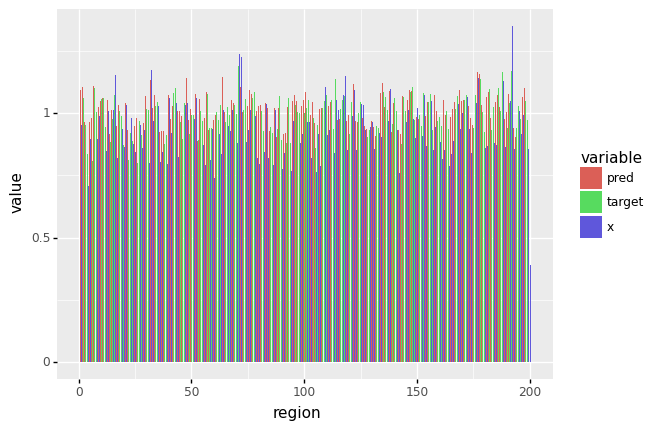

<ggplot: (8727186728120)>

In [44]:
(ggplot(data_mean, aes(x='region', y='value', fill='variable')) + geom_col(stat='identity', position='dodge'))

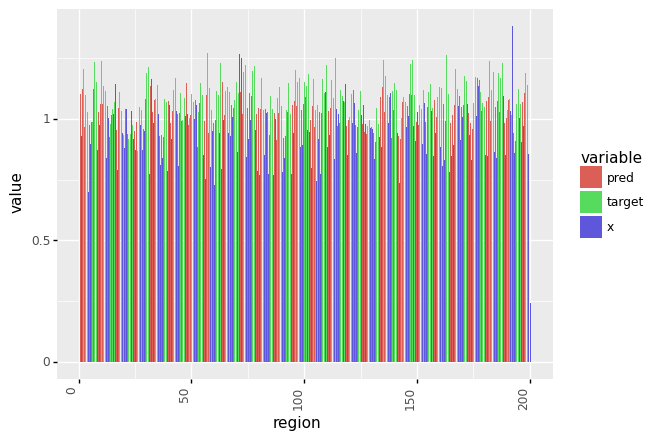

<ggplot: (8727186737300)>

In [45]:
(ggplot(data, aes(x='region', y='value', fill='variable')) + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(rotation=90, hjust=1)))

In [46]:
dct = {"region": [(i+1) for i in np.arange(200)], "x": x, "pred": pred, "target": target, "tau_delta": target-x.numpy(), "pred_tau_delta": pred-x.numpy()}
data = pd.DataFrame(dct)
data

,region,x,pred,target,tau_delta,pred_tau_delta
0,1,0.931923,1.101916,1.19234,0.260417,0.169993
1,2,0.970045,1.121938,1.20533,0.235285,0.151893
2,3,0.807212,0.966335,1.09794,0.290728,0.159123
3,4,0.698055,0.970018,1.02745,0.329395,0.271963
4,5,0.896285,0.976073,1.06921,0.172925,0.079788
...,...,...,...,...,...,...
195,196,0.903735,0.994739,1.06369,0.159955,0.091004
196,197,0.970873,1.070273,1.13908,0.168207,0.099400
197,198,0.939702,1.105266,1.18967,0.249968,0.165564
198,199,0.855222,1.022560,1.13860,0.283378,0.167338


In [47]:
data = data.melt(id_vars = ["region"], value_vars=["tau_delta", "pred_tau_delta"])
data

,region,variable,value
0,1,tau_delta,0.260417
1,2,tau_delta,0.235285
2,3,tau_delta,0.290728
3,4,tau_delta,0.329395
4,5,tau_delta,0.172925
...,...,...,...
395,196,pred_tau_delta,0.091004
396,197,pred_tau_delta,0.099400
397,198,pred_tau_delta,0.165564
398,199,pred_tau_delta,0.167338


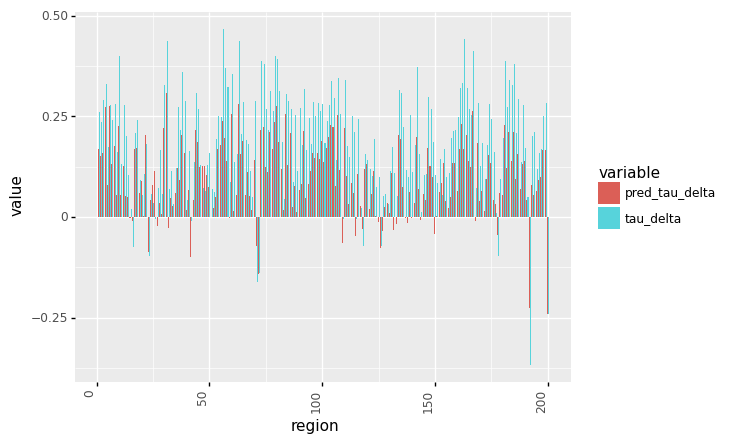

<ggplot: (8727186873417)>

In [48]:
(ggplot(data, aes(x='region', y='value', fill='variable')) + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(rotation=90, hjust=1)))

In [49]:
dct = {"region": [(i+1) for i in np.arange(200)], "x": x, "pred": pred, "target": target, "pred_error": target-pred, "tau_delta": target-x.numpy()}
data = pd.DataFrame(dct)
data

,region,x,pred,target,pred_error,tau_delta
0,1,0.931923,1.101916,1.19234,0.090424,0.260417
1,2,0.970045,1.121938,1.20533,0.083392,0.235285
2,3,0.807212,0.966335,1.09794,0.131605,0.290728
3,4,0.698055,0.970018,1.02745,0.057432,0.329395
4,5,0.896285,0.976073,1.06921,0.093138,0.172925
...,...,...,...,...,...,...
195,196,0.903735,0.994739,1.06369,0.068951,0.159955
196,197,0.970873,1.070273,1.13908,0.068807,0.168207
197,198,0.939702,1.105266,1.18967,0.084404,0.249968
198,199,0.855222,1.022560,1.13860,0.116040,0.283378


In [50]:
data = data.melt(id_vars = ["region"], value_vars=["pred_error", "tau_delta"])
data

,region,variable,value
0,1,pred_error,0.090424
1,2,pred_error,0.083392
2,3,pred_error,0.131605
3,4,pred_error,0.057432
4,5,pred_error,0.093138
...,...,...,...
395,196,tau_delta,0.159955
396,197,tau_delta,0.168207
397,198,tau_delta,0.249968
398,199,tau_delta,0.283378


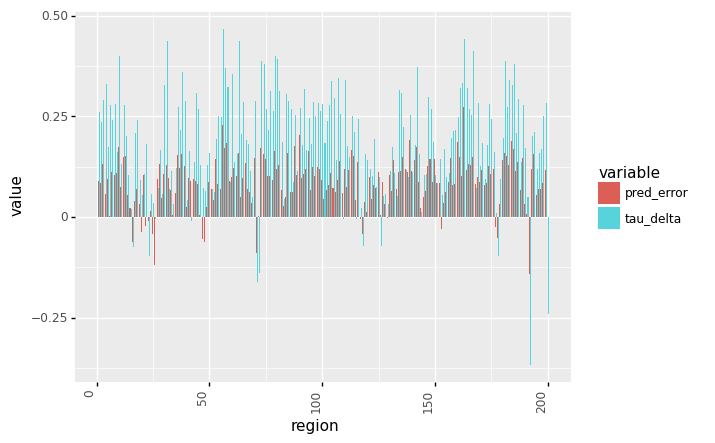

<ggplot: (8727186690811)>

In [51]:
(ggplot(data, aes(x='region', y='value', fill='variable')) + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(rotation=90, hjust=1)))

In [52]:
# Load left and right hemispheres
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
m = load_group_fc('schaefer',scale=200)


gm = GradientMaps(n_components=2, approach='dm', kernel='normalized_angle')
gm.fit(m)

values = target - x.numpy()

grad = map_to_labels(values, labeling, mask=labeling != 0, fill=np.nan)
test_ones = np.zeros(grad.shape)
plot_hemispheres(surf_lh, surf_rh, color_bar=True, interactive=True, array_name=grad, size=(800, 400))

In [53]:
batch[:,:,3:].shape

torch.Size([64, 10, 200])

In [54]:
batch[:,:,3:].flatten().std()

tensor(0.4409)

## New Format

In [55]:
with open('data.pickle', 'rb') as handle:
    dat = pickle.load(handle)
# dat = [(input, target, prediction, class, input_len)]

In [56]:
min_mse = 1.0
min_mse_arg = -1
for i in np.arange(len(dat)):
    diagnosis = dat[i][3]
    input_len = dat[i][4]
    if diagnosis == 0:
        target = dat[i][1]
        pred = dat[i][2]
        mse = ((target - pred)**2).mean()
        if mse < min_mse:
            min_mse = mse
            min_mse_arg = i
            #print(i, mse)
print(min_mse_arg, min_mse)

3775 tensor(0.0027)


In [57]:
single_dat = dat[3775]

x = single_dat[0][0,0,2:202]
target = single_dat[1][0,:]
pred = single_dat[2][0,:]
label = single_dat[3] # 0: CN, 1: MCI, 2: Dementia

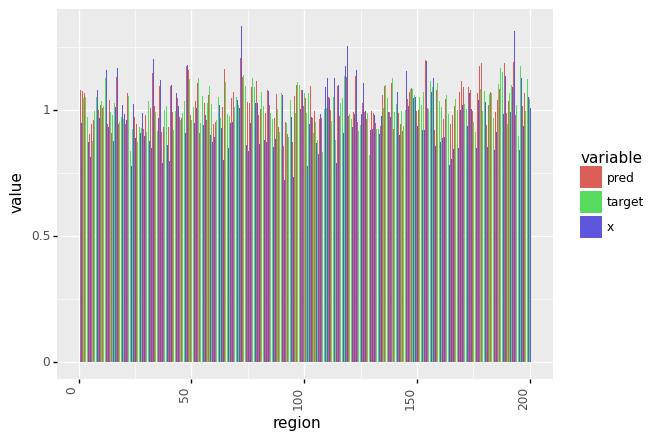

<ggplot: (8727187092538)>

In [58]:
dct = {"region": [(i+1) for i in np.arange(200)], "x": x, "pred": pred, "target": target}
data = pd.DataFrame(dct)
data = data.melt(id_vars = ["region"], value_vars=["x", "pred", "target"])
(ggplot(data, aes(x='region', y='value', fill='variable')) + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(rotation=90, hjust=1)))

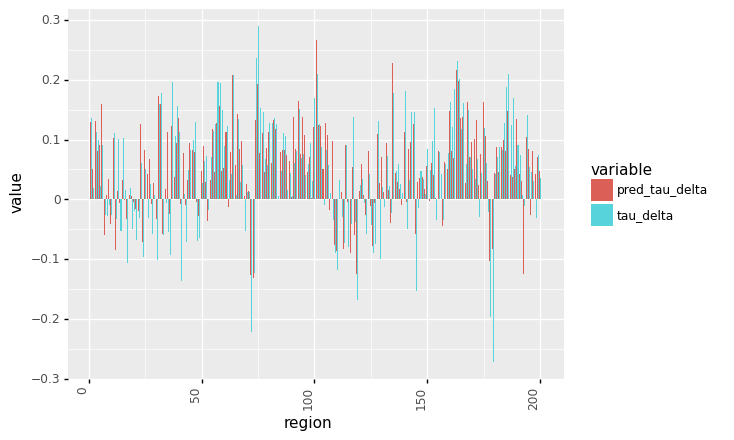

<ggplot: (8727186851366)>

In [59]:
dct = {"region": [(i+1) for i in np.arange(200)], "x": x, "pred": pred, "target": target, "tau_delta": target-x.numpy(), "pred_tau_delta": pred-x.numpy()}
data = pd.DataFrame(dct)
data = data.melt(id_vars = ["region"], value_vars=["tau_delta", "pred_tau_delta"])
(ggplot(data, aes(x='region', y='value', fill='variable')) + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(rotation=90, hjust=1)))

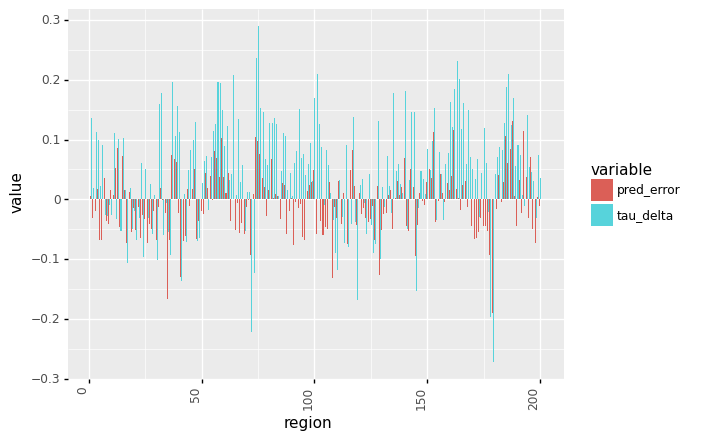

<ggplot: (8727187030866)>

In [60]:
dct = {"region": [(i+1) for i in np.arange(200)], "x": x, "pred": pred, "target": target, "pred_error": target-pred, "tau_delta": target-x.numpy()}
data = pd.DataFrame(dct)
data = data.melt(id_vars = ["region"], value_vars=["pred_error", "tau_delta"])
(ggplot(data, aes(x='region', y='value', fill='variable')) + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(rotation=90, hjust=1)))

In [61]:
# Load left and right hemispheres
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
m = load_group_fc('schaefer',scale=200)


gm = GradientMaps(n_components=2, approach='dm', kernel='normalized_angle')
gm.fit(m)

values = x

grad = map_to_labels(values, labeling, mask=labeling != 0, fill=np.nan)
test_ones = np.zeros(grad.shape)
plot_hemispheres(surf_lh, surf_rh, color_bar=True, interactive=False, array_name=grad, size=(800, 400))